In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email_spam_classify/spam.csv')

In [18]:
df.shape

(5572, 3)

In [11]:
df['label'] = df.Category.apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df.loc[0,'Message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
X = df.Message
y = df.label

In [79]:
CV = CountVectorizer()
X = CV.fit_transform(X)

In [80]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [84]:
X_test.shape

(1115, 8709)

In [85]:
X_train.shape

(4457, 8709)

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

In [57]:
models = {
    'logist': LogisticRegression(max_iter=1000),
    'RF': RandomForestClassifier(),
    'DS': DecisionTreeClassifier(),
    'XGB': XGBClassifier(n_estimators=100),
    'MNB': MultinomialNB(),
    'Ada': AdaBoostClassifier()
}
scores =["accuracy","precision","recall"]

In [86]:
from sklearn.model_selection import cross_val_score
import prettytable as pt
def cross_val_score_mean(est,score):
  tb1 = pt.PrettyTable()
  tb1.field_names=['model_name','accuracy_score','precision_score','recall_score'] 
  for model_name,model in est.items():
    mata_data = {}
    for s in score:
      cvs = cross_val_score(model,X_train,y_train,cv=3,scoring = s)
      mata_data[s]=cvs.mean()      
    tb1.add_row([model_name,mata_data['accuracy'],mata_data['precision'],mata_data['recall']])
  print(tb1)

In [87]:
cross_val_score_mean(models,scores)

+------------+--------------------+--------------------+--------------------+
| model_name |   accuracy_score   |  precision_score   |    recall_score    |
+------------+--------------------+--------------------+--------------------+
|   logist   |  0.9759930696225   | 0.9753437183632148 |  0.84201309578194  |
|     RF     | 0.9679140741949176 | 0.9916666666666667 | 0.7679982403600493 |
|     DS     | 0.9602882420737963 | 0.8731077014025317 | 0.8319374651032941 |
|    XGB     | 0.9663444675557731 | 0.9631708709643932 | 0.7781415494983334 |
|    MNB     | 0.9822743662133523 | 0.9447990666428622 | 0.920985398372333  |
|    Ada     | 0.9676909667937035 | 0.9388227513227513 | 0.8117439047087288 |
+------------+--------------------+--------------------+--------------------+


In [88]:
tb2 = pt.PrettyTable()
tb2.field_names = ['model_name','accuracy_score','precision_score','recall_score']

def get_accuracy_recall_predision_score(est,X,Y,x,y):
  for model_name,model_a in est.items():
    pred = model_a.fit(X,Y).predict(x)
    tb2.add_row([model_name,accuracy_score(y,pred),precision_score(y,pred),recall_score(y,pred)])
  print(tb2)

In [89]:
get_accuracy_recall_predision_score(models,X_train,y_train,X_test,y_test)

+------------+--------------------+--------------------+--------------------+
| model_name |   accuracy_score   |  precision_score   |    recall_score    |
+------------+--------------------+--------------------+--------------------+
|   logist   | 0.9865470852017937 | 0.9858156028368794 | 0.9144736842105263 |
|     RF     | 0.9802690582959641 |        1.0         | 0.8552631578947368 |
|     DS     | 0.9730941704035875 | 0.9121621621621622 | 0.8881578947368421 |
|    XGB     |  0.97847533632287  | 0.9776119402985075 | 0.8618421052631579 |
|    MNB     | 0.9802690582959641 | 0.8963414634146342 | 0.9671052631578947 |
|    Ada     | 0.9766816143497757 | 0.9436619718309859 | 0.881578947368421  |
+------------+--------------------+--------------------+--------------------+


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [92]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight':[{0:1,1:v} for v in np.linspace(1,15,20)]
        
    },
    scoring = {'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)},
    refit = 'precision',
    cv = 5
)

In [99]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.736842105263158},
                                          {0: 1, 1: 2.473684210526316},
                                          {0: 1, 1: 3.2105263157894735},
                                          {0: 1, 1: 3.9473684210526314},
                                          {0: 1, 1: 4.684210526315789},
                                          {0: 1, 1: 5.421052631578947},
                                          {0: 1, 1: 6.157894736842105},
                                          {0: 1, 1: 6.894736842105263},
                                          {0: 1, 1: 7.63157894736842},
                                          {0: 1, 1: 8.368421052631579},
                                          {0: 1, 1: 9.105263157894736},
                                          {

In [104]:
res = pd.DataFrame(grid.fit(X_train,y_train).cv_results_)

In [105]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.160851,0.063367,0.004429,0.000090,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.953271,0.961905,0.971429,0.980198,...,0.016093,2,0.857143,0.848739,0.857143,0.831933,0.857143,0.850420,0.009800,20
1,0.098082,0.023367,0.003250,0.000784,"{0: 1, 1: 1.736842105263158}","{'class_weight': {0: 1, 1: 1.736842105263158}}",0.954128,0.962617,0.971698,0.980769,...,0.015821,1,0.873950,0.865546,0.865546,0.857143,0.873950,0.867227,0.006288,19
2,0.094021,0.006896,0.002668,0.000137,"{0: 1, 1: 2.473684210526316}","{'class_weight': {0: 1, 1: 2.473684210526316}}",0.954955,0.954955,0.971963,0.962963,...,0.016738,4,0.890756,0.890756,0.873950,0.873950,0.882353,0.882353,0.007516,18
3,0.111543,0.036940,0.002635,0.000101,"{0: 1, 1: 3.2105263157894735}","{'class_weight': {0: 1, 1: 3.2105263157894735}}",0.955357,0.954955,0.971963,0.963303,...,0.016647,3,0.899160,0.890756,0.873950,0.882353,0.882353,0.885714,0.008570,17
4,0.094405,0.003298,0.002567,0.000025,"{0: 1, 1: 3.9473684210526314}","{'class_weight': {0: 1, 1: 3.9473684210526314}}",0.955752,0.946903,0.972222,0.963636,...,0.018196,7,0.907563,0.899160,0.882353,0.890756,0.882353,0.892437,0.009800,16
5,0.117835,0.029559,0.002563,0.000048,"{0: 1, 1: 4.684210526315789}","{'class_weight': {0: 1, 1: 4.684210526315789}}",0.956140,0.946903,0.972222,0.963636,...,0.018146,5,0.915966,0.899160,0.882353,0.890756,0.882353,0.894118,0.012577,15
6,0.097817,0.004886,0.002609,0.000018,"{0: 1, 1: 5.421052631578947}","{'class_weight': {0: 1, 1: 5.421052631578947}}",0.956140,0.946903,0.972222,0.963636,...,0.018146,5,0.915966,0.899160,0.882353,0.890756,0.890756,0.895798,0.011399,14
7,0.118247,0.034950,0.002583,0.000069,"{0: 1, 1: 6.157894736842105}","{'class_weight': {0: 1, 1: 6.157894736842105}}",0.956140,0.939130,0.972222,0.963636,...,0.020096,10,0.915966,0.907563,0.882353,0.890756,0.899160,0.899160,0.011884,13
8,0.097714,0.005170,0.002632,0.000073,"{0: 1, 1: 6.894736842105263}","{'class_weight': {0: 1, 1: 6.894736842105263}}",0.956897,0.939655,0.972222,0.963636,...,0.019880,9,0.932773,0.915966,0.882353,0.890756,0.899160,0.904202,0.018101,12
9,0.118476,0.036477,0.002554,0.000049,"{0: 1, 1: 7.63157894736842}","{'class_weight': {0: 1, 1: 7.63157894736842}}",0.956897,0.940171,0.972222,0.963636,...,0.019741,8,0.932773,0.924370,0.882353,0.890756,0.899160,0.905882,0.019455,11


In [107]:
grid.best_params_

{'class_weight': {0: 1, 1: 1.736842105263158}}

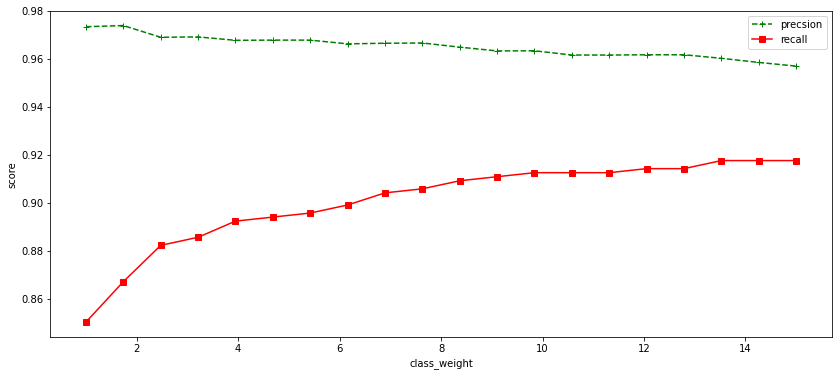

In [108]:
fig = plt.figure(figsize=(14,6))
x_scale=res['param_class_weight']
plt.plot([i[1] for i in x_scale],res['mean_test_precision'],'g--+',label='precsion')
plt.plot([i[1] for i in x_scale],res['mean_test_recall'],'r-s',label='recall')
plt.xlabel('class_weight')
plt.ylabel('score')

plt.legend()
plt.show()

In [110]:
import pickle
with open('email_spam_classify_model.pickle','wb') as f:
    pickle.dump(grid,f)